<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/recommendation_movies_Deep_Learning_wilfrid_limite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
reviews = pd.read_csv('/content/drive/My Drive/movies_recommendations/ratings.dat', names=['userId', 'movieId', 'rating', 'time'], delimiter='::', engine='python')
users = pd.read_csv('/content/drive/My Drive/movies_recommendations/users.dat', names=['userId','gender','age','occupation','zip'], delimiter='::', engine='python')

print('Reviews shape:', reviews.shape)
print('Users shape:', users.shape)


Reviews shape: (1000209, 4)
Users shape: (6040, 5)


In [ ]:
try:
    movies_df=pd.read_csv('/content/drive/My Drive/movies_recommendations/movies.dat', sep='::', header=None, engine='python', encoding='utf-8')
except UnicodeDecodeError:
    movies_df=pd.read_csv('/content/drive/My Drive/movies_recommendations/movies.dat', sep='::', header=None, engine='python', encoding='latin-1')
movies_df.columns = ['movieId', 'title', 'genres']
print(movies_df.head())

   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [ ]:
print('movies_df shape:', movies_df.shape)

movies_df shape: (3883, 3)


In [ ]:
reviews.drop(['time'], axis=1, inplace=True)
users.drop(['zip'], axis=1, inplace=True)

In [ ]:
movies_df['release_year'] = movies_df['title'].str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)


Merging all  *dataset* users, reviews et Movies

In [ ]:
final_df = reviews.merge(movies_df, on='movieId', how='left').merge(users, on='userId', how='left')

print('Final_df shape:', final_df.shape)

Final_df shape: (1000209, 9)


In [ ]:
final_df.head()

,userId,movieId,rating,title,genres,release_year,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1975,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,1996,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,1964,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,2000,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998,F,1,10


Collaborative Filtering - Deep Learning

One important thing to keep in mind is that in an approach based purely on collaborative filtering, the similarity is not calculated using factors like the age of users, genre of the movie, or any other data about users or items.
It is calculated only on the basis of the rating (explicit or implicit) a user gives to an item.
For example, two users can be considered similar if they give the same ratings to ten movies despite there being a big difference in their age

In [ ]:
userid_nunique = final_df['userId'].nunique()
movieid_nunique = final_df['movieId'].nunique()

print('User_id total unique:', userid_nunique)
print('Movieid total unique:', movieid_nunique)

User_id total unique: 6040
Movieid total unique: 3706


build our first collaborative filtering ann model


    The user / movie features are currently non-sequential integers representing some unique ID for that entity
    We need them to be sequential starting at zero to use for modeling (if not, it will throw an error)
    We can use scikit-learn’s LabelEncoder class to transform the fields
    Finally, We’ll also create variables with the total number of unique users and movies in the data


In [ ]:


from sklearn.preprocessing import LabelEncoder

user_enc = LabelEncoder()
final_df['userId'] = user_enc.fit_transform(final_df['userId'])

movie_enc = LabelEncoder()
final_df['movieId'] = movie_enc.fit_transform(final_df['movieId'])



In [ ]:
print(final_df.head())

   userId  movieId  rating                                   title  \
0       0     1104       5  One Flew Over the Cuckoo's Nest (1975)   
1       0      639       3        James and the Giant Peach (1996)   
2       0      853       3                     My Fair Lady (1964)   
3       0     3177       4                  Erin Brockovich (2000)   
4       0     2162       5                    Bug's Life, A (1998)   

                         genres release_year gender  age  occupation  
0                         Drama         1975      F    1          10  
1  Animation|Children's|Musical         1996      F    1          10  
2               Musical|Romance         1964      F    1          10  
3                         Drama         2000      F    1          10  
4   Animation|Children's|Comedy         1998      F    1          10  


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Reshape, Dot, Flatten, concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG

Model 1

---



In [ ]:
# # Notes: Reshape(n_dim, ) is same with Flatten, we can use both (choose one)

# def RecommenderV1(n_users, n_movies, n_dim):

#     # User
#     user = Input(shape=(1,))
#     U = Embedding(n_users, n_dim)(user)
#     U = Flatten()(U)

#     # Movie
#     movie = Input(shape=(1,))
#     M = Embedding(n_movies, n_dim)(movie)
#     M = Flatten()(M)

#     # Dot U and M
#     x = Dot(axes=1)([U, M])

#     model = Model(inputs=[user, movie], outputs=x)

#     model.compile(optimizer=Adam(0.0001),
#                   loss='mean_squared_error')

#     return model

In [ ]:
# model1 = RecommenderV1(userid_nunique, movieid_nunique, 100)

In [ ]:


# svg = SVG(model_to_dot(model1, show_shapes=True, show_layer_names=True, rankdir='HB', dpi=70).create(prog='dot', format='svg'))
# display(svg)


In [ ]:
# print(model1.summary())


Train test split and ratins est utilisé comme label

In [ ]:
from sklearn.model_selection import train_test_split

X = final_df.drop(['rating'], axis=1)
y = final_df['rating']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2020)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((900188, 8), (100021, 8), (900188,), (100021,))

  train model 1

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
# checkpoint1 = ModelCheckpoint('model1.h5.keras', monitor='val_loss', verbose=1, save_best_only=True)

La métrique à surveiller pour décider quand sauvegarder le modèle. Ici, la perte de validation (val_loss) est surveillée. Cela signifie que le modèle sera sauvegardé chaque fois que la perte de validation s'améliore

In [ ]:
# history1 = model1.fit(x=[X_train['userId'], X_train['movieId']], y=y_train, batch_size=64, epochs=10, verbose=1, validation_data=([X_val['userId'], X_val['movieId']], y_val), callbacks=[checkpoint1])

Model 1 Evaluation

In [ ]:
# import matplotlib.pyplot as plt

# # Get training and test loss histories
# training_loss1 = history1.history['loss']
# test_loss1 = history1.history['val_loss']

# # Create count of the number of epochs
# epoch_count = range(1, len(training_loss1) + 1)
# plt.title("Model 1: Collaborative Filtering with Deep Learning (ANN)")
# # Visualize loss history
# plt.plot(epoch_count, training_loss1, 'r--')
# plt.plot(epoch_count, test_loss1, 'b-')
# plt.legend(['Training Loss', 'Test Loss'])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()



Model 2

In [ ]:
# # Notes: Reshape(n_dim, ) is same with Flatten, we can use both (choose one)

# def RecommenderV2(n_users, n_movies, n_dim):

#     # User
#     user = Input(shape=(1,))
#     U = Embedding(n_users, n_dim)(user)
#     U = Flatten()(U)

#     # Movie
#     movie = Input(shape=(1,))
#     M = Embedding(n_movies, n_dim)(movie)
#     M = Flatten()(M)

#     # Ganti disini
#     merged_vector = concatenate([U, M])
#     dense_1 = Dense(128, activation='relu')(merged_vector)
#     dropout = Dropout(0.5)(dense_1)
#     final = Dense(1)(dropout)

#     model = Model(inputs=[user, movie], outputs=final)

#     model.compile(optimizer=Adam(0.001),
#                   loss='mean_squared_error')

#     return model

In [ ]:
# model2 = RecommenderV2(userid_nunique, movieid_nunique, 100)

In [ ]:
# svg2 = SVG(model_to_dot(model2, show_shapes=True, show_layer_names=True, rankdir='HB', dpi=70).create(prog='dot', format='svg'))
# display(svg2)

In [ ]:
# model2.summary()

In [ ]:
# checkpoint2 = ModelCheckpoint('model2.h5.keras', monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:
# history2 = model2.fit(x=[X_train['userId'], X_train['movieId']], y=y_train, batch_size=64, epochs=20,
#                       verbose=1, validation_data=([X_val['userId'], X_val['movieId']], y_val), callbacks=[checkpoint2])


Model 2 Evaluation

In [ ]:
# # Get training and test loss histories
# training_loss2 = history2.history['loss']
# test_loss2 = history2.history['val_loss']

# # Create count of the number of epochs
# epoch_count = range(1, len(training_loss2) + 1)

# # Visualize loss history
# plt.plot(epoch_count, training_loss2, 'r--')
# plt.plot(epoch_count, test_loss2, 'b-')
# plt.legend(['Training Loss', 'Test Loss'])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()

Model 3

In [ ]:
# # Notes: Reshape(n_dim, ) is same with Flatten, we can use both (choose one)

# def RecommenderV3(n_users, n_movies, n_dim):

#     # User
#     user = Input(shape=(1,))
#     U = Embedding(n_users, n_dim)(user)
#     U = Flatten()(U)
#     U = Dense(64, activation='relu')(U)

#     # Movie
#     movie = Input(shape=(1,))
#     M = Embedding(n_movies, n_dim)(movie)
#     M = Flatten()(M)
#     M = Dense(64, activation='relu')(M)

#     # Dot U and M
#     x = concatenate([U, M])
#     x = Dropout(0.25)(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     final = Dense(1)(x)

#     model = Model(inputs=[user, movie], outputs=final)

#     model.compile(optimizer=Adam(0.0001),
#                   loss='mean_squared_error')

#     return model

In [ ]:
# model3 = RecommenderV3(userid_nunique, movieid_nunique, 100)

Model 3 - plot and summary

In [ ]:
# svg3 = SVG(model_to_dot(model3, show_shapes=True, show_layer_names=True, rankdir='HB', dpi=70).create(prog='dot', format='svg'))
# display(svg3)

In [ ]:
# model3.summary()

In [ ]:
# checkpoint3 = ModelCheckpoint('model3.h5.keras', monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:
# history3 = model3.fit(x=[X_train['userId'], X_train['movieId']], y=y_train, batch_size=64, epochs=20,
#                       verbose=1, validation_data=([X_val['userId'], X_val['movieId']], y_val), callbacks=[checkpoint3])

Model 3 - evaluation

In [ ]:
# # Get training and test loss histories
# training_loss3 = history3.history['loss']
# test_loss3 = history3.history['val_loss']

# # Create count of the number of epochs
# epoch_count = range(1, len(training_loss3) + 1)

# # Visualize loss history
# plt.plot(epoch_count, training_loss3, 'r--')
# plt.plot(epoch_count, test_loss3, 'b-')
# plt.legend(['Training Loss', 'Test Loss'])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()



---



Model 4 avec genres et descriptions

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Input, Embedding, Flatten, Dot, Concatenate, Dense

In [ ]:
X_train['combined_features'] = X_train['genres'] + ' ' + X_train['title']
X_val['combined_features'] = X_val['genres'] + ' ' + X_val['title']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix_train = tfidf.fit_transform(X_train['combined_features'])
tfidf_matrix_val = tfidf.transform(X_val['combined_features'])

In [ ]:
def RecommenderV4(n_users, n_movies, n_dim, tfidf_dim):
    # User Input
    user = Input(shape=(1,))
    U = Embedding(n_users, n_dim)(user)
    U = Flatten()(U)

    # Movie Input
    movie = Input(shape=(1,))
    M = Embedding(n_movies, n_dim)(movie)
    M = Flatten()(M)

    # Additional Features Input
    additional_features = Input(shape=(tfidf_dim,))

    # Concatenate Embeddings and Additional Features
    x = Concatenate()([U, M, additional_features])

    # Dense Layers
    x = Dense(128, activation='relu')(x)
    output = Dense(1)(x)

    # Create and Compile Model
    model = Model(inputs=[user, movie, additional_features], outputs=output)
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model


In [ ]:
# Combiner les genres et les titres
X_train['combined_features'] = X_train['genres']
X_val['combined_features'] = X_val['genres']

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix_train = tfidf.fit_transform(X_train['combined_features'])
tfidf_matrix_val = tfidf.transform(X_val['combined_features'])

In [ ]:
n_users = final_df['userId'].nunique()
n_movies = final_df['movieId'].nunique()
n_dim = 100
tfidf_matrix_shape = tfidf_matrix_train.shape[1]

In [ ]:
# Créer le modèle 4
model4 = RecommenderV4(n_users, n_movies, n_dim, tfidf_matrix_shape)

In [ ]:
print(model4.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_10            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 1, 100)         │        604,000 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 1, 100)         │        370,600 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 100)            │              0 │ embedding_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 100)            │              0 │ embedding_7[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_11            │ (None, 20)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 220)            │              0 │ flatten_6[0][0],       │
│ (Concatenate)             │                        │                │ flatten_7[0][0],       │
│                           │                        │                │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         28,288 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            129 │ dense_6[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,003,017 (3.83 MB)

 Trainable params: 1,003,017 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

None


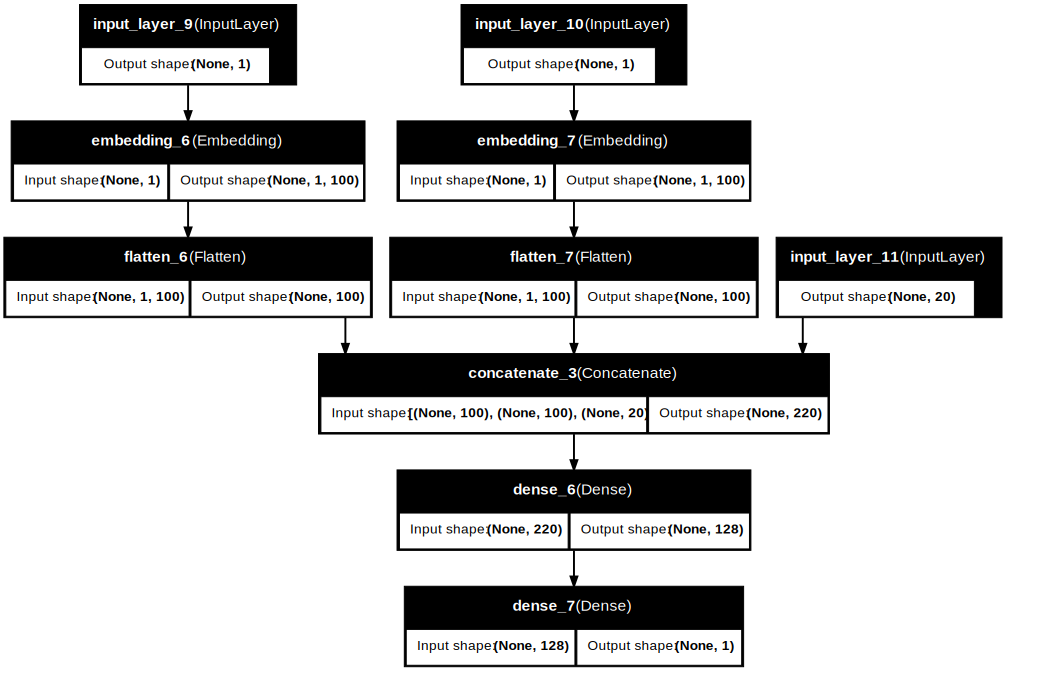

In [ ]:
svg4 = SVG(model_to_dot(model4, show_shapes=True, show_layer_names=True, rankdir='HB', dpi=70).create(prog='dot', format='svg'))
display(svg4)

In [ ]:
checkpoint4 = ModelCheckpoint('model4.h5.keras', monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:
X_train['userId']

961865    5794
801747    4801
426626    2589
552498    3400
40971      274
          ... 
769701    4584
578153    3531
105650     697
850016    5103
930492    5620
Name: userId, Length: 900188, dtype: int64

In [ ]:
X_train['movieId']

961865    3104
801747    1296
426626     356
552498    2977
40971      578
          ... 
769701      41
578153    1890
105650    3081
850016    1106
930492    1111
Name: movieId, Length: 900188, dtype: int64

In [ ]:
tfidf_matrix_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33820368, 0.43199025, 0.        , ..., 0.        , 0.52810306,
        0.        ],
       [0.43503734, 0.        , 0.        , ..., 0.        , 0.        ,
        0.90041241]])

In [ ]:
tfidf_matrix_train.toarray().shape

(900188, 20)

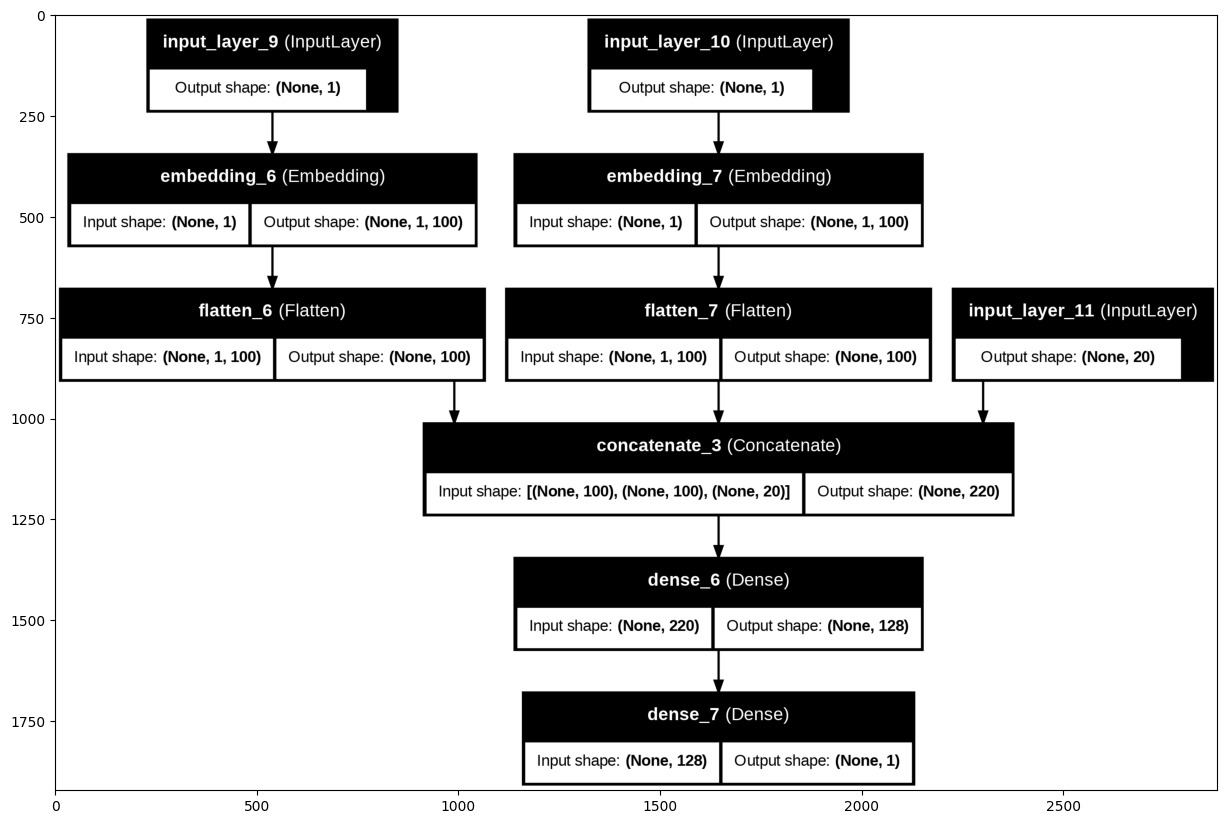

In [ ]:
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Afficher le modèle
plt.figure(figsize=(15,15))
plot_model(model4, to_file='model4.png', show_shapes=True, show_layer_names=True)
img = plt.imread('model4.png')
plt.imshow(img)
plt.show()

In [ ]:
history4 = model4.fit(
    [X_train['userId'], X_train['movieId'], tfidf_matrix_train.toarray()],
    y_train,
    epochs=10,
    validation_data=(
        [X_val['userId'], X_val['movieId'], tfidf_matrix_val.toarray()],
        y_val
    ),
    verbose=1,
    callbacks=[checkpoint4]
)


Epoch 1/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 1.0846 - val_loss: 0.7956
Epoch 2/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.7745 - val_loss: 0.7610
Epoch 3/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.7249 - val_loss: 0.7464
Epoch 4/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6919 - val_loss: 0.7396
Epoch 5/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6634 - val_loss: 0.7446
Epoch 6/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6321 - val_loss: 0.7427
Epoch 7/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6072 - val_loss: 0.7489
Epoch 8/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.5865 - val_loss: 0.7490
Epoch 9/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.5663 - val_loss: 0.7647
Epoch 10/10
28131/28131 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.5461 - val_loss: 0.7664


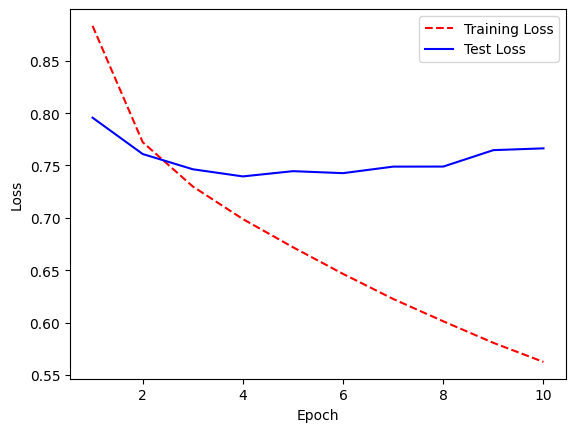

In [ ]:
# Get training and test loss histories
training_loss4 = history4.history['loss']
test_loss4 = history4.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss4) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss4, 'r--')
plt.plot(epoch_count, test_loss4, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Model 5 avec genres ,descriptions, age,gender et occupattions

In [ ]:

def RecommenderV5(n_users, n_movies,  genres,title, age, gender,occupation,n_dim,):
    # User Input
    user = Input(shape=(1,))
    U = Embedding(n_users, n_dim)(user)
    U = Flatten()(U)

    # Movie Input
    movie = Input(shape=(1,))
    M = Embedding(n_movies, n_dim)(movie)
    M = Flatten()(M)

    # Combine Genres and Descriptions *****
    combined_features = genres + ' ' + title + ' ' + age + ' ' + gender + ' ' + occupation
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(combined_features)

    # Additional Features Input
    additional_features = Input(shape=(tfidf_matrix.shape[1],))

    # Concatenate Embeddings and Additional Features
    x = Concatenate()([U, M, additional_features])

    # Dense Layers
    x = Dense(128, activation='relu')(x)
    output = Dense(1)(x)

    # Create and Compile Model
    model = Model(inputs=[user, movie, additional_features], outputs=output)
    model.compile(optimizer=Adam(0.0001), loss='mean_squared_error')

    return model

In [ ]:
model5 = RecommenderV4(userid_nunique, movieid_nunique, X_train['genres'], X_train['title'], X_train['ages'], X_train['gender'] 100)


In [ ]:
print(model5.summary())

In [ ]:
svg5 = SVG(model_to_dot(model5, show_shapes=True, show_layer_names=True, rankdir='HB', dpi=70).create(prog='dot', format='svg'))
display(svg5)

In [ ]:
checkpoint5= ModelCheckpoint('model5.h5.keras', monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:
history5 = model5.fit([X_train['userId'], X_train['movieId'],X_train['genres'], X_train['title'], X_train['ages'], X_train['gender']], y_train, epochs=10, validation_data=([X_val['userId'], X_val['movieId'], X_val['genres'], X_val['title'], X_val['ages'], X_val['gender']], y_val), verbose=1, callbacks=[checkpoint4])

In [ ]:
# Get training and test loss histories
training_loss5 = history5.history['loss']
test_loss5 = history5.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss5) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss5, 'r--')
plt.plot(epoch_count, test_loss5, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



---



---

Let's compare Top-N recommendation made by all three models


---



---



In [ ]:
from tensorflow.keras.models import load_model

model1 = load_model('model1.h5.keras')
model2 = load_model('model2.h5.keras')
model3 = load_model('model3.h5.keras')

ValueError: File not found: filepath=model1.h5.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
def make_pred(user_id, movie_id, model):
    return model.predict([np.array([user_id]), np.array([movie_id])])[0][0]

In [ ]:
def get_topN_rec(user_id, model):

    user_ratings = final_df[final_df['userId'] == user_id][['userId', 'movieId', 'rating']]
    recommendation = final_df[~final_df['movieId'].isin(user_ratings['movieId'])][['movieId']].drop_duplicates()
    recommendation['rating_predict'] = recommendation.apply(lambda x: make_pred(user_id, x['movieId'], model), axis=1)

    final_rec = recommendation.sort_values(by='rating_predict', ascending=False).merge(movies[['movieId', 'Movie_names', 'release_year']],
                                                                       on='movieId',
                                                                       how='inner').head(10)

    return final_rec.sort_values('release_year', ascending=False).drop(['movieId', 'release_year'], axis=1)  # sort by recent year

In [ ]:
get_topN_rec(23, model1)

NameError: name 'get_topN_rec' is not defined

In [ ]:
get_topN_rec(23, model3)

NameError: name 'get_topN_rec' is not defined